<p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Netflix data Analysis <p/>

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Neccesary library
    </h2>
</div>

In [88]:
#importing  neccesary library and  data 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import os


<div id='process'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Pre-Processing
    </h2>
</div>

In [89]:
#importing dataset
df= pd.read_csv('netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [90]:
#removed all duplicates

# dropped ALL duplicate values
df.drop_duplicates(subset ="show_id",
                     keep = False, inplace = True)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [92]:
#changing datatype of date_added column to datetime
df["date_added"] = pd.to_datetime(df["date_added"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


<div id='Analyze'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Analyze and Visualization
    </h2>
</div>

In [93]:
# added month_added column
df['month_added'] = df['date_added'].dt.month_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June


In [94]:
# added year_added column
df['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018


In [95]:
# added day_added column
df['day_added']=df['date_added'].dt.day_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


In [96]:

import plotly.graph_objects as go

#types of show on netflix
types =df.groupby(['type',])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')
types

# Define labels, values, and colors for the pie chart
labels = types.index
values = types['count']
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             textinfo='percent', 
                             hoverinfo='label+percent',
                             hole=0.3,
                             marker=dict(colors=colors))])

# Update layout
fig.update_layout(title='Types of Shows on Netflix',
                  title_font_size=20)

# Show the plot
fig.show()


In [115]:
# Create a scatter plot
scatter_fig = px.scatter(types, x=types.index, y='count',
                         labels={'type': 'Type', 'count': 'Count'},
                         title='Show Counts by Type')

# Update layout
scatter_fig.update_layout(xaxis_title='Type', yaxis_title='Count',
                          title_font_size=20)

# Show the plot
scatter_fig.show()


In [116]:
# Create a box plot
box_fig = px.box(types, x=types.index, y='count',
                 labels={'type': 'Type', 'count': 'Count'},
                 title='Show Counts by Type')

# Update layout
box_fig.update_layout(xaxis_title='Type', yaxis_title='Count',
                      title_font_size=20)

# Show the plot
box_fig.show()


<div id='Top Director'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Top Director
    </h2>
</div>

In [97]:
#grouped by directors of show and type
show_director= df.groupby(['director','type'])[ 'director'].count().reset_index(name='show_count')
show_director


,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [98]:
#top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

,director,type,show_count
127,Alastair Fothergill,TV Show,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
1803,Jay Karas,Movie,14
2623,Marcus Raboy,Movie,15
2699,Martin Scorsese,Movie,12
3100,Not Given,Movie,173
3101,Not Given,TV Show,2415
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18


In [99]:
import plotly.express as px

# Exclude rows where director name is not given
top10_directors_filtered = top10_directors.dropna(subset=['director'])

# Sort the top 10 directors by show_count
top10_directors_filtered = top10_directors_filtered.sort_values(by='show_count', ascending=False).head(10)

# Create a bar chart
fig = px.bar(top10_directors_filtered, x='director', y='show_count',
             labels={'director': 'Director', 'show_count': 'Show Count'},
             title='Top 10 Directors with Most Shows on Netflix')

# Update layout
fig.update_layout(xaxis_title='', yaxis_title='Show Count',
                  title_font_size=20)

# Show the plot
fig.show()


In [117]:
# Create a scatter plot for top 10 directors
scatter_fig = px.scatter(top10_directors_filtered, x='director', y='show_count',
                         labels={'director': 'Director', 'show_count': 'Show Count'},
                         title='Show Counts by Director')

# Update layout
scatter_fig.update_layout(xaxis_title='Director', yaxis_title='Show Count',
                          title_font_size=20)

# Show the plot
scatter_fig.show()


In [118]:
# Create a violin plot for top 10 directors
violin_fig = px.violin(top10_directors_filtered, y='show_count', box=True, 
                       labels={'director': 'Director', 'show_count': 'Show Count'},
                       title='Show Counts by Director')

# Update layout
violin_fig.update_layout(yaxis_title='Show Count',
                         title_font_size=20)

# Show the plot
violin_fig.show()


<div id='Top Director'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Country And Movie Type
    </h2>
</div>

In [100]:
#grouped by contry and type
show_origin= df.groupby(['country','type'])[ 'type'].count().reset_index(name='show_count')
show_origin
#

,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [101]:
# Create a bar chart
fig = px.bar(show_origin, x='country', y='show_count', color='type',
             labels={'country': 'Country', 'show_count': 'Show Count', 'type': 'Type'},
             title='Show Count by Country and Type')

# Update layout
fig.update_layout(xaxis_title='', yaxis_title='Show Count',
                  title_font_size=20)

# Show the plot
fig.show()


In [121]:
# Create a horizontal bar chart
horizontal_bar_fig = px.bar(show_origin, y='country', x='show_count', color='type',
                            labels={'country': 'Country', 'show_count': 'Show Count', 'type': 'Type'},
                            title='Show Count by Country and Type', orientation='h')

# Update layout
horizontal_bar_fig.update_layout(yaxis_title='Country', xaxis_title='Show Count',
                                 title_font_size=20)

# Show the plot
horizontal_bar_fig.show()


In [120]:
# Create a stacked bar chart
stacked_bar_fig = px.bar(show_origin, x='country', y='show_count', color='type',
                          labels={'country': 'Country', 'show_count': 'Show Count', 'type': 'Type'},
                          title='Show Count by Country and Type')

# Update layout
stacked_bar_fig.update_layout(xaxis_title='Country', yaxis_title='Show Count',
                              title_font_size=20, barmode='stack')

# Show the plot
stacked_bar_fig.show()


<div id='key findings'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Top Country
    </h2>
</div>

In [102]:
#write query to find top20 country
top20_country=show_origin.query("`show_count` >= 81")
top20_country

,country,type,show_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


In [114]:
import plotly.express as px

# Assuming 'top20_country' is your DataFrame with country, type, and show_count

# Create a bar chart with color differentiation for TV shows and movies
fig = px.bar(top20_country, x='country', y='show_count', color='type',
             labels={'country': 'Country', 'show_count': 'Show Count', 'type': 'Type'},
             title='Top 20 Countries with Most Shows on Netflix')

# Update layout
fig.update_layout(xaxis_title='', yaxis_title='Show Count',
                  title_font_size=20)

# Show the plot
fig.show()


In [122]:
# Create a grouped bar chart
grouped_bar_fig = px.bar(top20_country, x='country', y='show_count', color='type',
                          labels={'country': 'Country', 'show_count': 'Show Count', 'type': 'Type'},
                          title='Show Count by Country and Type')

# Update layout
grouped_bar_fig.update_layout(xaxis_title='Country', yaxis_title='Show Count',
                              title_font_size=20, barmode='group')

# Show the plot
grouped_bar_fig.show()


<div id='key findings'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Genre and Type
    </h2>
</div>

In [103]:
#grouped by listed_In and type
show_genre= df.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='show_genre_count')
show_genre


,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [104]:
import plotly.express as px

# Assuming 'show_genre' is your DataFrame with listed_in (genre), type, and show_genre_count

# Create a bar chart
fig = px.bar(show_genre, x='listed_in', y='show_genre_count', color='type',
             labels={'listed_in': 'Genre', 'show_genre_count': 'Show Count', 'type': 'Type'},
             title='Show Count by Genre and Type')

# Update layout
fig.update_layout(xaxis_title='', yaxis_title='Show Count',
                  title_font_size=20)

# Show the plot
fig.show()


In [124]:
# Create a horizontal bar chart
horizontal_bar_fig = px.bar(show_genre, y='listed_in', x='show_genre_count', color='type',
                            labels={'listed_in': 'Genre', 'show_genre_count': 'Show Count', 'type': 'Type'},
                            title='Show Count by Genre and Type', orientation='h')

# Update layout
horizontal_bar_fig.update_layout(yaxis_title='Genre', xaxis_title='Show Count',
                                 title_font_size=20)

# Show the plot
horizontal_bar_fig.show()


<div id='key findings'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Release Month
    </h2>
</div>

In [105]:
#grouped by month_added and type
release_month= df.groupby(['month_added','type'])[ 'type'].count().reset_index(name='release_month')
release_month

,month_added,type,release_month
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


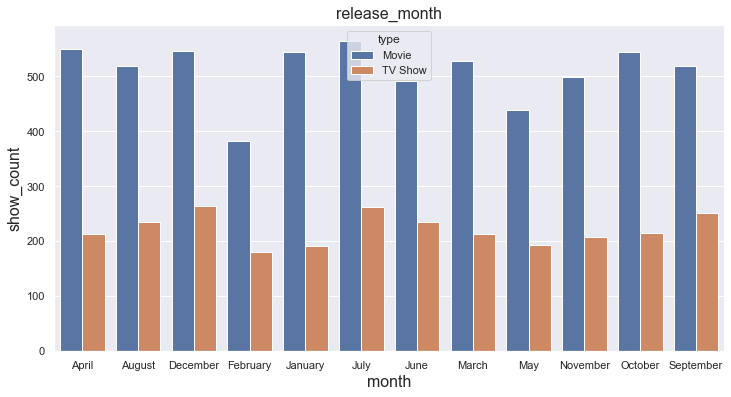

In [111]:
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.title('release_month' , fontsize=16)
plt.xlabel('month', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

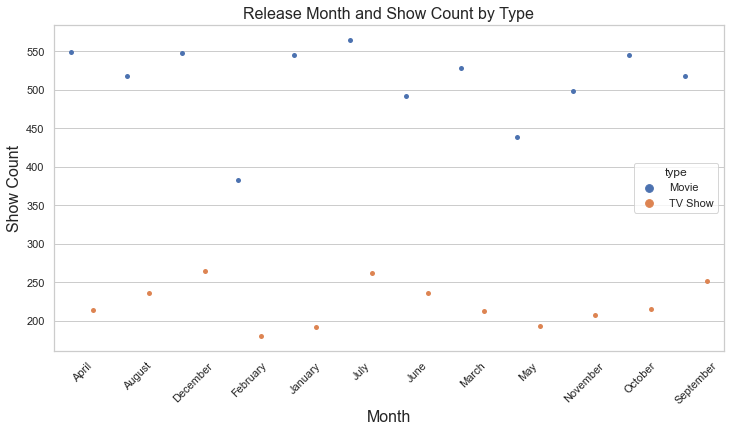

<Figure size 864x432 with 0 Axes>

In [126]:
sns.swarmplot(x='month_added', y='release_month', hue='type', data=release_month.reset_index(), dodge=True);
plt.title('Release Month and Show Count by Type', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Show Count', fontsize=16)
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()




<div id='key findings'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Release Year
    </h2>
</div>

In [106]:
#grouped by year_added and type
release_year= df.groupby(['year_added','type'])[ 'type'].count().reset_index(name='release_count')
release_year

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'release_count'),
 Text(0.5, 1.0, 'release_per_year')]

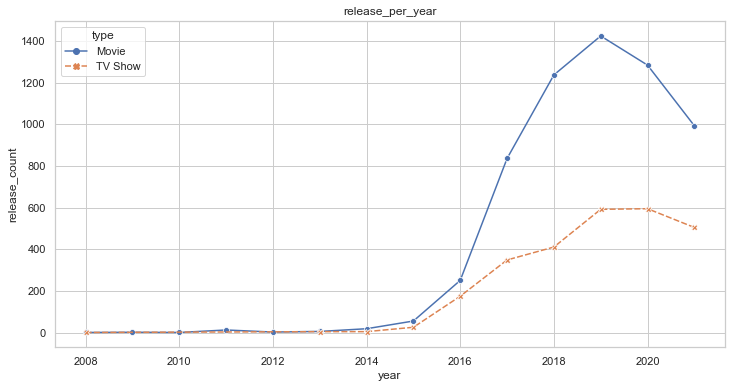

In [112]:
sns.set_style("whitegrid")
# plot boxplot
gfg = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = release_year)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')

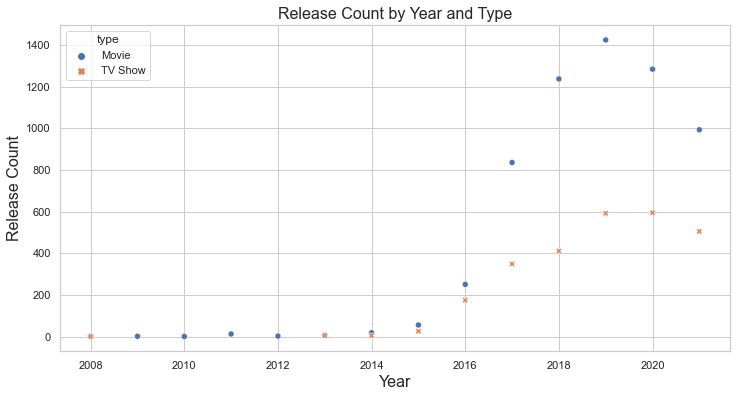

In [127]:
sns.scatterplot(x='year_added', y='release_count', hue='type', style='type', data=release_year, markers=True)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Release Count', fontsize=16)
plt.title('Release Count by Year and Type', fontsize=16)
plt.show()



<div id='key findings'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Release Day
    </h2>
</div>

In [107]:
#grouped by day_added and type
release_Day= df.groupby(['day_added','type'])[ 'type'].count().reset_index(name='release_Day')
release_Day

,day_added,type,release_Day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


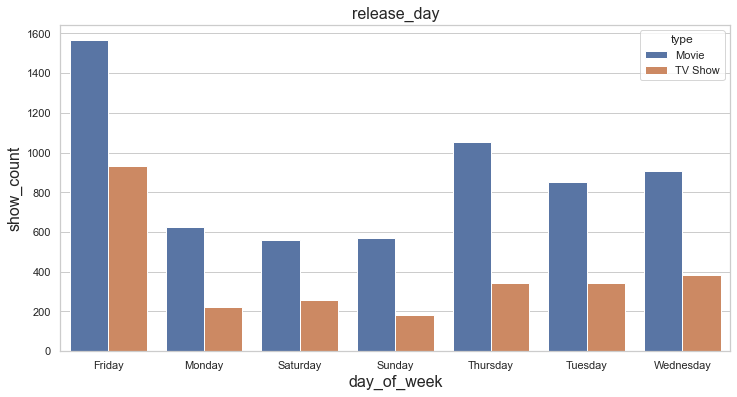

In [110]:
sns.barplot(x =release_Day.reset_index()['day_added'], y= release_Day.reset_index()['release_Day'],
            hue =  release_Day.reset_index()['type']);
plt.title('release_day' , fontsize=16)
plt.xlabel('day_of_week', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

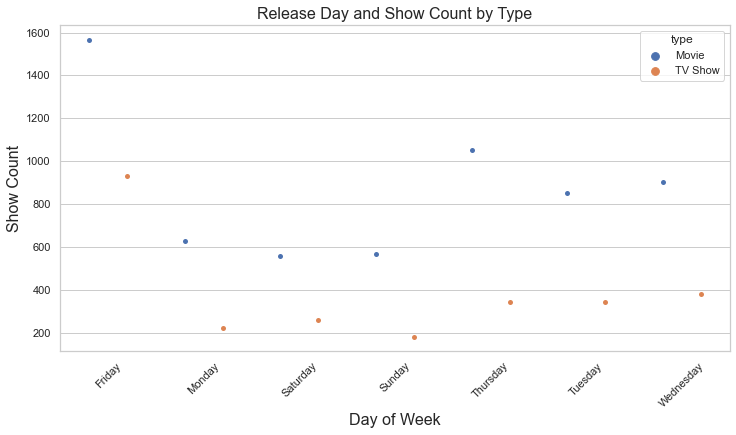

<Figure size 864x432 with 0 Axes>

In [130]:
sns.swarmplot(x='day_added', y='release_Day', hue='type', data=release_Day.reset_index(), dodge=True);
plt.title('Release Day and Show Count by Type', fontsize=16)
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('Show Count', fontsize=16)
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()




<div id='key findings'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">key findings
    </h2>
</div>



1. **Pie Chart Comparing Movie and TV Show Uploads (2008-2021)**:
   The pie chart illustrates the distribution of Netflix uploads between movies and TV shows from 2008 to 2021. The data indicates a 39.4% increase in movie uploads during this period, implying a notable growth in the availability of movies on Netflix compared to TV shows.


2. **Director with the Most TV Shows**:
   The director with the most TV shows is listed as "Not Given" with a total of 2415 TV shows.


3. **Top Countries for Movies and TV Shows**:
   The observation highlights that Netflix has the highest number of movies and TV episodes from the United States, followed by India and the United Kingdom. This indicates a significant amount of content sourced from these countries.

4. **Top Genres by Title Count**:
   The barchart displaying the top genres indicates that "Dramas, International Movies" is the most prevalent genre on Netflix, followed by "Crime TV Shows," "International TV Shows," and "TV Dramas," with "Stand-Up Comedy" ranking third. This implies a strong presence of drama-related content, both in movies and TV shows, along with a notable interest in crime-related content.


5. **Release Month Bar Chart**:
   The bar chart displaying the release months of new shows throughout the year demonstrates a consistent release pattern, indicating that Netflix routinely introduces new content irrespective of the month. This showcases a steady effort to engage the audience with fresh content consistently.

6. **Release per Year Line Chart**:
   The line chart displaying the releases per year indicates a substantial increase in show additions from 2014 onwards. This suggests that Netflix significantly ramped up its content acquisition and production efforts, aligning with the growth and popularity of the platform.

7. **Release Day Bar Chart**:
   The observation regarding the majority of shows being released on Friday, as indicated by the release day bar chart, suggests a strategic approach by Netflix to release content during the end of the week when many viewers have more leisure time to watch.

